In [1]:
import numpy as np
import os, pickle
from itertools import product
import pandas as pd

import sys
sys.path.append('/mnt/disk1/yunseob/Pytorch/1_CapsuleEndo/algorithms')
from ce_utils.data import test_data_load
from ce_model.cnn_inf import cnn_model
from ce_utils.cls_eval import cls_metric, extract_score, test_by_category

# 1. Load data

In [2]:
# np_test_X, np_test_Y = test_data_load(filename = 'data_config_np_frb_sv.pkl')
# np_hd_test_X, np_hd_test_Y = test_data_load(filename = 'data_config_np-hd_frb_sv.pkl')

np_test_name, np_test_X, np_test_Y = test_data_load(filename = 'data_config_np_frb_sv_add_200917.pkl')

1005
1457


In [3]:
np_test_X.shape

(2462, 3, 512, 512)

In [4]:
root = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'
label_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'

label = pd.read_csv(label_dir + '/label.csv', index_col = 0)

In [5]:
label

,negative,positive,hemorrhagic,red_spot,angioectasia,active_bleeding,depressed,erosion,ulcer,stricture,protruded,ampulla_of_vater,lymphoid_follicles,small_bowel_tumor,etc,phlebectasia,lymphangiectasia,source
BK___02-02-14___1014671.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2
BS___00-42-54___1005149.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2
BS___00-42-54___1005150.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2
BS___00-48-17___1005795.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2
BS___01-01-12___1007346.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2
BS___01-01-13___1007348.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2
BS___01-01-56___1007433.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2
BS___01-02-46___1007534.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2
BS___01-31-27___1010976.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2
BS___01-36-40___1011602.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,190520 p3_2


In [6]:
sources = sorted(list(set(label['source'].tolist())))
sources

['190520 p3_2',
 '190520 p3_2, 190814 negative',
 '190520 p3_2, 200713-1 AI feedback/01/FN',
 '190520 p3_2, 200713-1 AI feedback/02/FN',
 '190814 negative',
 '200121 validation',
 '200713-1 AI feedback/01',
 '200713-1 AI feedback/01/FN',
 '200713-1 AI feedback/02',
 '200713-1 AI feedback/02/FN',
 '200713-1 AI feedback/03',
 '200713-1 AI feedback/03/FN',
 '200713-2 AI feedback/04',
 '200713-2 AI feedback/05',
 '200713-2 AI feedback/06',
 '200917 AI feedback/01',
 '200917 AI feedback/02',
 '200917 AI feedback/03',
 '200917 AI feedback/04',
 '200917 AI feedback/05',
 '200917 AI feedback/06',
 '200917 AI feedback/07']

In [7]:
target_sources = [i for i in sources if '200713-2' in i and '190520 p3_2' not in i]
target_sources

['200713-2 AI feedback/04',
 '200713-2 AI feedback/05',
 '200713-2 AI feedback/06']

In [22]:
target_sources = [i for i in sources if '200121 validation' not in i and '200917' not in i]
target_sources

['190520 p3_2',
 '190520 p3_2, 190814 negative',
 '190520 p3_2, 200713 clip for AI re-screening/01/FN',
 '190520 p3_2, 200713 clip for AI re-screening/02/FN',
 '190814 negative',
 '200713 clip for AI re-screening/01',
 '200713 clip for AI re-screening/01/FN',
 '200713 clip for AI re-screening/02',
 '200713 clip for AI re-screening/02/FN',
 '200713 clip for AI re-screening/03',
 '200713 clip for AI re-screening/03/FN',
 '200713-2/04',
 '200713-2/05',
 '200713-2/06']

In [23]:
pos_ids, neg_ids = [], []
for i, name in enumerate(label.index.values):
    if label.loc[name, 'source'] in target_sources:
        if label.loc[name, 'positive'] == 1:
            pos_ids.append(name)
        elif label.loc[name, 'negative'] == 1:
            neg_ids.append(name)
            
print(len(neg_ids), len(pos_ids), '=', len(neg_ids) + len(pos_ids))

16153 7020 = 23173


In [21]:
pos_ids, neg_ids = [], []
for i, name in enumerate(label.index.values):
    if label.loc[name, 'source'] in target_sources:
        if label.loc[name, 'positive'] == 1:
            pos_ids.append(name)
        elif label.loc[name, 'negative'] == 1:
            neg_ids.append(name)
            
print(len(neg_ids), len(pos_ids), '=', len(neg_ids) + len(pos_ids))

30398 7445 = 37843


In [11]:
pos_ids, neg_ids = [], []
for i, name in enumerate(label.index.values):
    if label.loc[name, 'source'] in target_sources:
        if label.loc[name, 'positive'] == 1:
            pos_ids.append(name)
        elif label.loc[name, 'negative'] == 1:
            neg_ids.append(name)
            
print(len(neg_ids), len(pos_ids))

14245 425


# 2. Load model

In [8]:
!nvidia-smi

Mon Oct 26 10:15:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.26       Driver Version: 430.26       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:1D:00.0 Off |                  N/A |
| 35%   58C    P2   231W / 250W |  10995MiB / 11019MiB |     85%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  On   | 00000000:1E:00.0 Off |                  N/A |
| 27%   22C    P8     5W / 250W |     10MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

# 3. Evaluation
## 3.1. Accuracy, Sensitivity ...

In [13]:
from ce_utils.cls_eval import cls_metric, extract_score

In [14]:
def extract_score(model, test_X, test_Y, batch_size=20):
#     model.evaluation(test_X, test_Y, batch_size)
    model.inference(test_X, batch_size)
    return model.score

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
#     mean = np.array([0.485, 0.456, 0.406])
#     std = np.array([0.229, 0.224, 0.225])
    
#     mean = np.array([0.5, 0.5, 0.5])
#     std = np.array([0.5, 0.5, 0.5])
    
#     inp = std * inp + mean
#     inp = np.clip(inp, 0, 1)
#     plt.imshow(inp)
    plt.imshow(cv2.cvtColor(inp, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  

In [6]:
# np_hd_010_score = extract_score(np_hd_010_model, np_hd_test_X, np_hd_test_Y)
np_010_score = extract_score(np_010_model, np_test_X, np_test_Y)

model_list = ['add 200917 (rotate)']
score_list = [np_010_score]

df = pd.DataFrame(columns = ['model', 'Accr', 'Sens', 'Spec', 'NPV', 'PPV'])

for i, model, score in zip(range(len(model_list)), model_list, score_list):
#     df.loc[i] = [model.model_name] + cls_metric(test_Y, score).cm2metric()
    df.loc[i] = [model] + cls_metric(np_test_Y, score).cm2metric()
    
df

2462: 124(*20) |################################################## | 100.0% prediction


,model,Accr,Sens,Spec,NPV,PPV
0,add 200917 (rotate),84.24,82.98,86.07,77.72,89.62


## 3.2. Accr by sub-class

In [17]:
def test_by_subclass(model, filename, X, Y):
    def extract_accr(model, x, y):
#     accrs = []
#     for i, test_x in enumerate(test_xs):
#         if i == 0:
#             model.Evaluation(test_x, GenerateLabel(test_x, 0))
#         else:
#             model.Evaluation(test_x, GenerateLabel(test_x, 1))
#         accrs.append(model.accr)
    
        model.evaluation(x, y, batch_size = 20, print_accr = False)
        return model.accr
    
    label_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'
    label = pd.read_csv(label_dir + '/label.csv', index_col = 0)
    
    accrs = []
    for sub_cls in label.columns[:-1]:
    
        x, y = [], []
        for name, img, cls in zip(filename, X, Y):
            if label.loc[('').join(name.split('__c_-_-_-'))][sub_cls] == 1:
                x.append(img)
                y.append(cls)

        x = np.concatenate([x])
        y = np.asarray(y)
    
        accrs.append(extract_accr(model, x, y)) 
        
    print()
    return accrs

In [8]:
np_010_accrs = test_by_subclass(np_010_model, np_test_name, np_test_X, np_test_Y)

1005: 51(*20) |################################################## | 100.0% prediction
1457: 73(*20) |################################################## | 100.0% prediction
663: 34(*20) |################################################## | 100.0% prediction
370: 19(*20) |################################################## | 100.0% prediction
2: 1(*20) |################################################## | 100.0% prediction
293: 15(*20) |################################################## | 100.0% prediction
733: 37(*20) |################################################## | 100.0% prediction
297: 15(*20) |################################################## | 100.0% prediction
410: 21(*20) |################################################## | 100.0% prediction
48: 3(*20) |################################################## | 100.0% prediction
49: 3(*20) |################################################## | 100.0% prediction
3: 1(*20) |################################################## | 100.0%

In [10]:
label_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'
label = pd.read_csv(label_dir + '/label.csv', index_col = 0)

model_list = ['add 200917 (rotate)']
accrs_list = [np_010_accrs]

df = pd.DataFrame(columns = ['model'] + list(label.columns[:-1]))

for i, model, accrs in zip(range(len(model_list)), model_list, accrs_list):
#     df.loc[i] = [model.model_name] + cls_metric(test_Y, score).cm2metric()
    df.loc[i] = [model] + accrs
    
df

,model,negative,positive,hemorrhagic,red_spot,angioectasia,active_bleeding,depressed,erosion,ulcer,stricture,protruded,ampulla_of_vater,lymphoid_follicles,small_bowel_tumor,etc,phlebectasia,lymphangiectasia
0,add 200917 (rotate),86.07,82.98,86.58,82.7,100.0,91.47,83.9,83.84,83.9,81.25,67.35,66.67,71.79,42.86,46.94,26.32,60.0


# 4. Comparison

In [24]:
gpu_idx = 3

model_dir = './model/'

np_200713_1_only_update_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'np_200713_1', gpu_idx = gpu_idx)

np_200713_2_only_update_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'np_200713_2', gpu_idx = gpu_idx)

np_200917_only_update_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'np_200917', gpu_idx = gpu_idx)

model:
np_200713_1_0.0001_16_2010211757_431_t_accr_0.9811_t_loss_0.332176_v_accr_0.8909_v_loss_0.423377.pt

model:
np_200713_2_0.0001_16_2010221423_203_t_accr_0.9884_t_loss_0.324911_v_accr_0.9405_v_loss_0.371670.pt

model:
np_200917_0.0001_16_2010232312_203_t_accr_0.9933_t_loss_0.320004_v_accr_0.9840_v_loss_0.329142.pt



In [23]:
gpu_idx = 3

model_dir = '/mnt/disk1/yunseob/Pytorch/1_CapsuleEndo/model_developlment/1_detection_localization/2_data_aug/model/'

np_hd_000_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_---_0', gpu_idx = gpu_idx)

np_hd_100_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_f--', gpu_idx = gpu_idx)

np_hd_010_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_-r-', gpu_idx = gpu_idx)

np_hd_001_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_--b', gpu_idx = gpu_idx)

np_hd_110_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_fr-', gpu_idx = gpu_idx)

np_hd_111_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_frb_0', gpu_idx = gpu_idx)

np_hd_111_sv_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                       model_dir = model_dir, model_name = 'B_frb_sv', gpu_idx = gpu_idx)

model_dir = '/mnt/disk1/yunseob/Pytorch/1_CapsuleEndo/model_developlment/2_AI_feedback/2_add_200713_1/model/'

np_200713_1_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                              model_dir = model_dir, model_name = 'np_binary', gpu_idx = gpu_idx)

model_dir = '/mnt/disk1/yunseob/Pytorch/1_CapsuleEndo/model_developlment/2_AI_feedback/3_add_200713_2/re-learning_200713_1_model/model/'

np_200713_2_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                              model_dir = model_dir, model_name = 'np_binary', gpu_idx = gpu_idx)

model_dir = '/mnt/disk1/yunseob/Pytorch/1_CapsuleEndo/model_developlment/2_AI_feedback/4_add_200917/re-learning_200713_2_model/model/'

np_200917_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                         model_dir = model_dir, model_name = 'np_binary', gpu_idx = gpu_idx)

model:
B_---_0.0001_16_2007142232_069_t_accr_0.9656_t_loss_0.347245_v_accr_0.9503_v_loss_0.364293.pt

model:
B_f--_0.0001_8_2007151017_037_t_accr_0.9627_t_loss_0.350014_v_accr_0.9537_v_loss_0.357257.pt

model:
B_-r-_0.0001_8_2007161324_046_t_accr_0.9800_t_loss_0.333166_v_accr_0.9740_v_loss_0.339054.pt

model:
B_--b_0.0001_8_2007170631_037_t_accr_0.9913_t_loss_0.322011_v_accr_0.9571_v_loss_0.356080.pt

model:
B_fr-_0.0001_16_2007190546_044_t_accr_0.9783_t_loss_0.334562_v_accr_0.9672_v_loss_0.346381.pt

model:
B_frb_0.0001_32_2007230941_010_t_accr_0.9827_t_loss_0.329607_v_accr_0.9751_v_loss_0.336306.pt

model:
B_frb_sv_0.0001_32_2007290554_016_t_accr_0.9961_t_loss_0.317016_v_accr_0.9774_v_loss_0.334313.pt

model:
np_binary_0.0001_8_2009101037_199_t_accr_0.9819_t_loss_0.331068_v_accr_0.9400_v_loss_0.373449.pt

model:
np_binary_0.0001_32_2010141023_117_t_accr_0.9772_t_loss_0.335948_v_accr_0.9340_v_loss_0.377869.pt

model:
np_binary_0.0001_16_2010162056_010_t_accr_0.9627_t_loss_0.349785_v_a

## 4.1. Accuracy, Sensitivity, ...

In [15]:
np_hd_000_score = extract_score(np_hd_000_model, np_test_X, np_test_Y)
np_hd_100_score = extract_score(np_hd_100_model, np_test_X, np_test_Y)
np_hd_010_score = extract_score(np_hd_010_model, np_test_X, np_test_Y)
np_hd_001_score = extract_score(np_hd_001_model, np_test_X, np_test_Y)
np_hd_110_score = extract_score(np_hd_110_model, np_test_X, np_test_Y)
np_hd_111_score = extract_score(np_hd_111_model, np_test_X, np_test_Y)
np_hd_111_sv_score = extract_score(np_hd_111_sv_model, np_test_X, np_test_Y)

np_200713_1_score = extract_score(np_200713_1_model, np_test_X, np_test_Y) 
np_200713_2_score = extract_score(np_200713_2_model, np_test_X, np_test_Y)
np_200917_score = extract_score(np_200917_model, np_test_X, np_test_Y)

np_200713_1_only_update_score = extract_score(np_200713_1_only_update_model, np_test_X, np_test_Y) 
np_200713_2_only_update_score = extract_score(np_200713_2_only_update_model, np_test_X, np_test_Y)
np_200917_only_update_score = extract_score(np_200917_only_update_model, np_test_X, np_test_Y)

2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |################################################## | 100.0% prediction
2462: 124(*20) |###########################

In [16]:
model_list = ['np-hd, -', 'np-hd, flip (r)', 'np-hd, rotate (r)', 'np-hd, blur (b)', 'np-hd, f + r', 
              'np-hd, f + r + b', 'f + r + b + sv', 
              '200713_1, r', '200713_2, r', '200917, r', 
              '200713_1 (only update), -', '200713_2 (only update), -', '200917 (only update), -']

score_list = [np_hd_000_score, np_hd_100_score, np_hd_010_score, np_hd_001_score,
              np_hd_110_score, np_hd_111_score, np_hd_111_sv_score, 
              np_200713_1_score, np_200713_2_score, np_200917_score, 
              np_200713_1_only_update_score, np_200713_2_only_update_score, np_200917_only_update_score]

np_hd_df = pd.DataFrame(columns = ['model', 'Accr', 'Sens', 'Spec', 'NPV', 'PPV'])

for i, model, score in zip(range(len(model_list)), model_list, score_list):
#     df.loc[i] = [model.model_name] + cls_metric(test_Y, score).cm2metric()
    np_hd_df.loc[i] = [model] + cls_metric(np_test_Y, score).cm2metric()
    
np_hd_df

,model,Accr,Sens,Spec,NPV,PPV
0,"np-hd, -",81.80,82.84,80.30,76.35,85.91
1,"np-hd, flip (r)",83.14,79.75,88.06,75.00,90.64
2,"np-hd, rotate (r)",86.31,87.44,84.68,82.30,89.22
3,"np-hd, blur (b)",82.41,80.44,85.27,75.04,88.79
4,"np-hd, f + r",82.17,83.46,80.30,77.00,86.00
5,"np-hd, f + r + b",86.39,87.58,84.68,82.46,89.23
6,f + r + b + sv,85.22,87.71,81.59,82.08,87.35
7,"200713_1, r",85.38,85.93,84.58,80.57,88.98
8,"200713_2, r",83.51,81.67,86.17,76.43,89.54
9,"200917, r",84.24,82.98,86.07,77.72,89.62


## 4.2. Accuracy by sub-class

In [ ]:
np_hd_000_score = extract_score(np_hd_000_model, np_test_X, np_test_Y)
np_hd_100_score = extract_score(np_hd_100_model, np_test_X, np_test_Y)
np_hd_010_score = extract_score(np_hd_010_model, np_test_X, np_test_Y)
np_hd_001_score = extract_score(np_hd_001_model, np_test_X, np_test_Y)
np_hd_110_score = extract_score(np_hd_110_model, np_test_X, np_test_Y)
np_hd_111_score = extract_score(np_hd_111_model, np_test_X, np_test_Y)
np_hd_111_sv_score = extract_score(np_hd_111_sv_model, np_test_X, np_test_Y)

np_200713_1_score = extract_score(np_200713_1_model, np_test_X, np_test_Y) 
np_200713_2_score = extract_score(np_200713_2_model, np_test_X, np_test_Y)
np_200917_score = extract_score(np_200917_model, np_test_X, np_test_Y)

np_200713_1_only_update_score = extract_score(np_200713_1_only_update_model, np_test_X, np_test_Y) 
np_200713_2_only_update_score = extract_score(np_200713_2_only_update_model, np_test_X, np_test_Y)
np_200917_only_update_score = extract_score(np_200917_only_update_model, np_test_X, np_test_Y)

In [18]:
np_hd_000_accrs = test_by_subclass(np_hd_000_model, np_test_name, np_test_X, np_test_Y)
np_hd_100_accrs = test_by_subclass(np_hd_100_model, np_test_name, np_test_X, np_test_Y)
np_hd_010_accrs = test_by_subclass(np_hd_010_model, np_test_name, np_test_X, np_test_Y)
np_hd_001_accrs = test_by_subclass(np_hd_001_model, np_test_name, np_test_X, np_test_Y)
np_hd_110_accrs = test_by_subclass(np_hd_110_model, np_test_name, np_test_X, np_test_Y)
np_hd_111_accrs = test_by_subclass(np_hd_111_model, np_test_name, np_test_X, np_test_Y)
np_hd_111_sv_accrs = test_by_subclass(np_hd_111_sv_model, np_test_name, np_test_X, np_test_Y)

np_200713_1_accrs = test_by_subclass(np_200713_1_model, np_test_name, np_test_X, np_test_Y)
np_200713_2_accrs = test_by_subclass(np_200713_2_model, np_test_name, np_test_X, np_test_Y)
np_200917_accrs = test_by_subclass(np_200917_model, np_test_name, np_test_X, np_test_Y) 

np_200713_1_only_update_accrs = test_by_subclass(np_200713_1_only_update_model, np_test_name, np_test_X, np_test_Y)
np_200713_2_only_update_accrs = test_by_subclass(np_200713_2_only_update_model, np_test_name, np_test_X, np_test_Y)
np_200917_only_update_accrs = test_by_subclass(np_200917_only_update_model, np_test_name, np_test_X, np_test_Y) 

1005: 51(*20) |################################################## | 100.0% prediction
1457: 73(*20) |################################################## | 100.0% prediction
663: 34(*20) |################################################## | 100.0% prediction
370: 19(*20) |################################################## | 100.0% prediction
2: 1(*20) |################################################## | 100.0% prediction
293: 15(*20) |################################################## | 100.0% prediction
733: 37(*20) |################################################## | 100.0% prediction
297: 15(*20) |################################################## | 100.0% prediction
410: 21(*20) |################################################## | 100.0% prediction
48: 3(*20) |################################################## | 100.0% prediction
49: 3(*20) |################################################## | 100.0% prediction
3: 1(*20) |################################################## | 100.0%

297: 15(*20) |################################################## | 100.0% prediction
410: 21(*20) |################################################## | 100.0% prediction
48: 3(*20) |################################################## | 100.0% prediction
49: 3(*20) |################################################## | 100.0% prediction
3: 1(*20) |################################################## | 100.0% prediction
39: 2(*20) |################################################## | 100.0% prediction
7: 1(*20) |################################################## | 100.0% prediction
49: 3(*20) |################################################## | 100.0% prediction
19: 1(*20) |################################################## | 100.0% prediction
30: 2(*20) |################################################## | 100.0% prediction

1005: 51(*20) |################################################## | 100.0% prediction
1457: 73(*20) |################################################## | 100.0% predic

In [19]:
model_list = ['np-hd, -', 'np-hd, flip (r)', 'np-hd, rotate (r)', 'np-hd, blur (b)', 'np-hd, f + r', 
              'np-hd, f + r + b', 'f + r + b + sv', 
              '200713_1, r', '200713_2, r', '200917, r', 
              '200713_1 (only update), -', '200713_2 (only update), -', '200917 (only update), -']

accrs_list = [np_hd_000_accrs, np_hd_100_accrs, np_hd_010_accrs, np_hd_001_accrs,
              np_hd_110_accrs, np_hd_111_accrs, np_hd_111_sv_accrs, 
              np_200713_1_accrs, np_200713_2_accrs, np_200917_accrs, 
              np_200713_1_only_update_accrs, np_200713_2_only_update_accrs, np_200917_only_update_accrs]

df = pd.DataFrame(columns = ['model'] + list(label.columns[:-1]))

for i, model, accrs in zip(range(len(model_list)), model_list, accrs_list):
#     df.loc[i] = [model.model_name] + cls_metric(test_Y, accrs).cm2metric()
    df.loc[i] = [model] + accrs
    
df

,model,negative,positive,hemorrhagic,red_spot,angioectasia,active_bleeding,depressed,erosion,ulcer,stricture,protruded,ampulla_of_vater,lymphoid_follicles,small_bowel_tumor,etc,phlebectasia,lymphangiectasia
0,"np-hd, -",80.30,82.84,90.95,86.76,100.0,96.25,81.99,80.81,82.93,62.50,30.61,33.33,23.08,71.43,48.98,47.37,50.00
1,"np-hd, flip (r)",88.06,79.75,89.29,85.14,100.0,94.54,78.72,77.10,79.51,72.92,22.45,66.67,15.38,42.86,34.69,21.05,43.33
2,"np-hd, rotate (r)",84.68,87.44,92.31,90.00,100.0,95.22,88.27,89.90,86.59,85.42,51.02,66.67,48.72,57.14,53.06,42.11,60.00
3,"np-hd, blur (b)",85.27,80.44,88.54,84.05,100.0,94.20,80.22,81.48,79.51,62.50,24.49,66.67,23.08,14.29,40.82,47.37,36.67
4,"np-hd, f + r",80.30,83.46,90.50,88.11,100.0,93.52,83.77,88.55,80.24,70.83,34.69,33.33,30.77,57.14,44.90,42.11,46.67
5,"np-hd, f + r + b",84.68,87.58,93.21,90.54,100.0,96.59,88.68,88.55,88.78,83.33,42.86,66.67,41.03,42.86,44.90,21.05,60.00
6,f + r + b + sv,81.59,87.71,93.36,91.08,100.0,96.25,88.81,87.54,90.00,75.00,40.82,33.33,38.46,57.14,46.94,47.37,46.67
7,"200713_1, r",84.58,85.93,87.48,80.54,100.0,96.25,87.04,87.21,87.32,79.17,79.59,100.00,87.18,28.57,59.18,36.84,73.33
8,"200713_2, r",86.17,81.67,84.62,79.46,100.0,91.13,82.67,85.52,80.73,70.83,65.31,66.67,69.23,42.86,48.98,36.84,56.67
9,"200917, r",86.07,82.98,86.58,82.70,100.0,91.47,83.90,83.84,83.90,81.25,67.35,66.67,71.79,42.86,46.94,26.32,60.00


# 5.Confusion Matrices to Corresponding Training Dataset

In [2]:
from ce_utils.data import load_image_from_path, gen_label
from ce_utils.preprocessing import extract_aug_suffix

In [29]:
def remove_annotation_mark(files):
    for c in range(len(files)):
        for i in range(len(files[c])):
            if 'annotation' in files[c][i]:
                files[c][i] = ''.join(files[c][i].split('_annotation'))
    return files

def train_image_load(filename, aug_frb = [0, 0, 0], aug_sv = False):
    
    root = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'
    data_dir = root + '/database'
    
    with open(root + '/' + filename, "rb") as f:
        data_config = pickle.load(f)

    train_aug_files = data_config['train_aug_files']
    
    train_aug_files = remove_annotation_mark(train_aug_files)
    
    target_aug = extract_aug_suffix(aug_frb, aug_sv, mode = 'load')
    
    train_aug_paths = []
    for train_aug_file in train_aug_files:
        train_aug_paths.append([os.path.join(data_dir, f) for f in train_aug_file 
                                if (f.split('c_')[-1])[:-4] in target_aug])

    train_names, train_Xs, train_Ys = [], [], []
    
    for i, train_path in enumerate(train_aug_paths):
#     for i, train_file in enumerate(train_files):
#         train_path = [os.path.join(data_dir, f) for f in train_file]
        print(len(train_path))
        train_Ys.append(gen_label(train_path, int(i)))
        imgs, filenames = load_image_from_path(train_path, extract_name = True)
        train_Xs.append(imgs)
        train_names.append(filenames)
        
    train_name = np.concatenate(train_names)
    train_X = np.concatenate(train_Xs)
    train_Y = np.concatenate(train_Ys)
    
    print()
    
    return train_name, train_X, train_Y

In [22]:
np_train_name, np_train_X, np_train_Y = train_image_load('{}.pkl'.format('data_config_np_---_--_only_200713_2'), [0, 0, 0], False)

6081
/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed/database/이 수한 (27780793) 19 Nov 18_1_frame_03013__c_-_-_-.jpg
(6081, 3, 512, 512)
2258
/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed/database/이 수한 (27780793) 19 Nov 18_1_frame_15752__c_-_-_-.jpg
(2258, 3, 512, 512)


In [26]:
data_config_list = ['data_config_np_frb_sv_add_200713_1', 'data_config_np_frb_sv_add_200713_2', 'data_config_np_frb_sv_add_200917', 
                    'data_config_np_---_--_only_200713_1', 'data_config_np_---_--_only_200713_2', 'data_config_np_---_--_only_200917']

model_list = [np_200713_1_model, np_200713_2_model, np_200917_model, 
              np_200713_1_only_update_model, np_200713_2_only_update_model, np_200917_only_update_model]

In [31]:
CMs = []

for data_config, model in zip(data_config_list, model_list):
    np_train_name, np_train_X, np_train_Y = train_image_load('{}.pkl'.format(data_config), [0, 0, 0], False)
    score = extract_score(model, np_train_X, np_train_Y)
    CMs.append((cls_metric(np_train_Y, score).cm))

6842
3356
10198: 510(*20) |################################################## | 100.0% prediction
12922
5614
18536: 927(*20) |################################################## | 100.0% prediction
24318
5954
30272: 1514(*20) |################################################## | 100.0% prediction
598
282
880: 44(*20) |################################################## | 100.0% prediction
6081
2258
8339: 417(*20) |################################################## | 100.0% prediction
11396
340
11736: 587(*20) |################################################## | 100.0% prediction


In [32]:
CMs

[array([[6762,   80],
        [ 111, 3245]]), array([[12624,   298],
        [  101,  5513]]), array([[23811,   507],
        [  339,  5615]]), array([[587,  11],
        [  7, 275]]), array([[6016,   65],
        [  15, 2243]]), array([[11372,    24],
        [    3,   337]])]

In [39]:
def plot_cm(cm, value_size = 15, label_size = 10, mode = 'percent'):
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    thresh = cm.max()/2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        if mode == 'percent':
            value = np.round(cm[i, j]/(np.sum(cm, 1)[i]), 3)
        if mode == 'num':
            value = cm[i, j]
        plt.text(j, i, value,
                 fontsize = value_size,
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.ylabel('True label', fontsize = label_size)
    plt.xlabel('Predicted', fontsize = label_size)
    plt.xticks([0, 1], ['nor', 'abnor'], rotation=0, fontsize = label_size)
    plt.yticks([0, 1], ['nor', 'abnor'], rotation=90, fontsize = label_size)

In [40]:
import matplotlib.pyplot as plt
from itertools import product

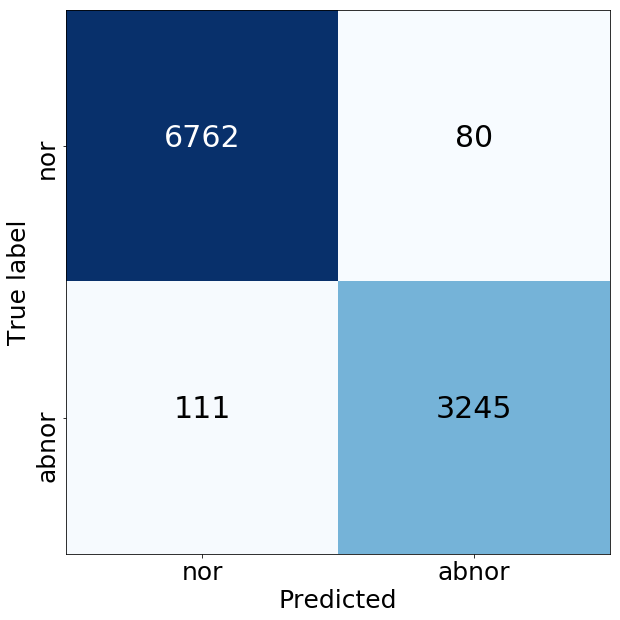

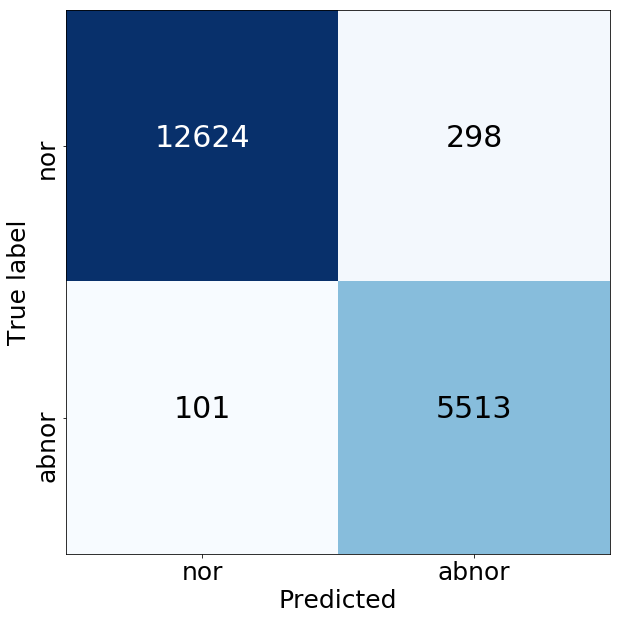

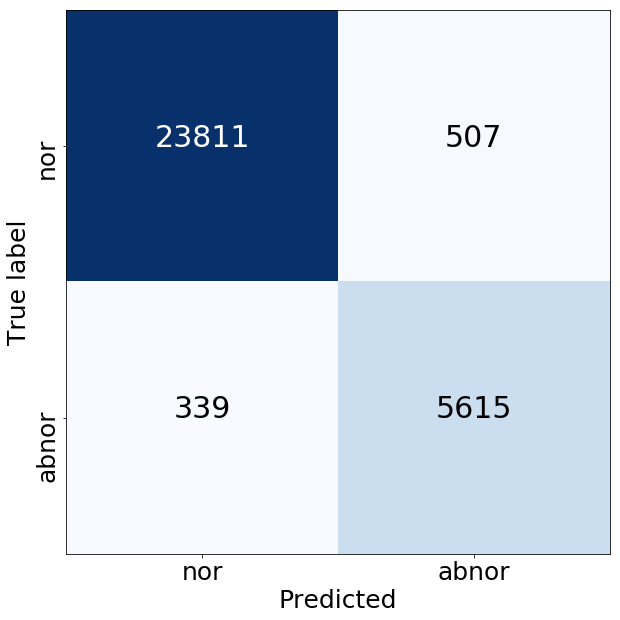

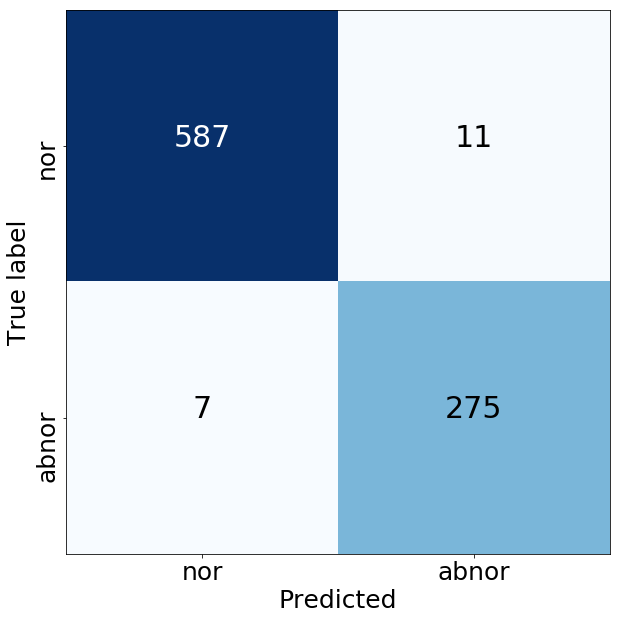

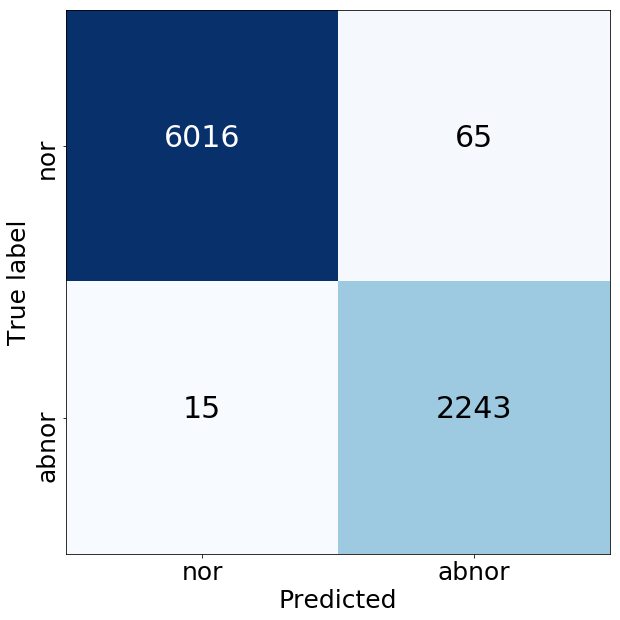

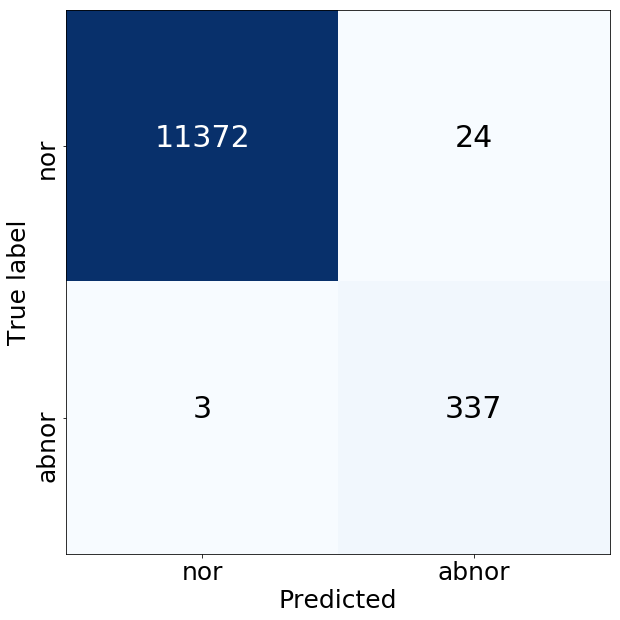

In [53]:
name_list = ['200713_1_added_training', '200713_2_added_training', '200917_added_training', 
             '200713_1_only_training', '200713_2_only_training', '200917_only_training']

for name, cm in zip(name_list, CMs):

    fig = plt.figure(figsize=(10, 10))
    plot_cm(cm, value_size = 30, label_size = 25, mode ='num')
    fig.savefig('CM_{}.png'.format(name), bbox_inches='tight')
#     plt.close(fig)

In [ ]:
np_200713_1_score = extract_score(np_200713_1_model, np_test_X, np_test_Y) 
np_200713_2_score = extract_score(np_200713_2_model, np_test_X, np_test_Y)
np_200917_score = extract_score(np_200917_model, np_test_X, np_test_Y)

np_200713_1_only_update_score = extract_score(np_200713_1_only_update_model, np_test_X, np_test_Y) 
np_200713_2_only_update_score = extract_score(np_200713_2_only_update_model, np_test_X, np_test_Y)
np_200917_only_update_score = extract_score(np_200917_only_update_model, np_test_X, np_test_Y)

In [ ]:
data_config_np-hd_frb_sv

In [ ]:
np_hd_000_score = extract_score(np_hd_000_model, np_test_X, np_test_Y)
np_hd_100_score = extract_score(np_hd_100_model, np_test_X, np_test_Y)
np_hd_010_score = extract_score(np_hd_010_model, np_test_X, np_test_Y)
np_hd_001_score = extract_score(np_hd_001_model, np_test_X, np_test_Y)
np_hd_110_score = extract_score(np_hd_110_model, np_test_X, np_test_Y)
np_hd_111_score = extract_score(np_hd_111_model, np_test_X, np_test_Y)
np_hd_111_sv_score = extract_score(np_hd_111_sv_model, np_test_X, np_test_Y)

np_200713_1_score = extract_score(np_200713_1_model, np_test_X, np_test_Y) 
np_200713_2_score = extract_score(np_200713_2_model, np_test_X, np_test_Y)
np_200917_score = extract_score(np_200917_model, np_test_X, np_test_Y)

np_200713_1_only_update_score = extract_score(np_200713_1_only_update_model, np_test_X, np_test_Y) 
np_200713_2_only_update_score = extract_score(np_200713_2_only_update_model, np_test_X, np_test_Y)
np_200917_only_update_score = extract_score(np_200917_only_update_model, np_test_X, np_test_Y)

# 4. Discussion

- 훈련데이터에 쓰인 비디오 -> AI 예측 -> 의사 검토 -> 데이터 추가 
- 특히 realistic한 negative데이터가 다량 추가되면서 specificity 성능 개선을 목표 
- Video Analysis에서 FP를 줄이는 게 목표
----------------------------------------------------------------------------------------------
- 데이터를 합쳐서 scratch부터 훈련하는 기존의 offline learning방법 
    - 성능향상은 이루지 못했지만, 보다 Realistic한 negative 데이터가 다량으로 추가되면서 specificity성능 향상
   
----------------------------------------------------------------------------------------------

- 이한희 교수님 생각 (정답만 알려줘서  업데이트하는 방법)
    - 극심한 성능저하 (특히 Sensitivity, NPV)
    - 200917 데이터 특히 Class Imbalance가 극심하기 때문에, Specificity의 극대화가 설명이 됨.